We will begin by reading in our data and conducting some exploratory data analysis

In [6]:
# import libraries and read files as data frames and do EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sf_dev_projs = pd.read_csv('./data/five_yr_pipeline.csv')

/var/folders/yh/b24zcpkj281fq42xxb9z60mr0000gn/T/ipykernel_81410/2499853756.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_dev_projs = pd.read_csv('./data/five_yr_pipeline.csv')


In [8]:
sf_dev_projs.head()

,landuse,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,unitsnet,pipelineunits,...,heightbul,pda,longitude,latitude,year,qtr,yearqtr,latlong,currentpolicedistricts,affordable
0,Resident,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,None applied,0.0,1.0,1.0,...,40-X,Richmond Corridors,-122.508817,37.772600,2022.0,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,0.0
1,Vacant,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,None applied,0.0,0.0,0.0,...,270-CS,Eastern Neighborhoods,-122.400848,37.776946,2022.0,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),1.0,0.0
2,Resident,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,Bayview/Southeast Neighborhoods,-122.388080,37.718621,2022.0,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),2.0,0.0
3,Resident,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,J Church and Mission Corridor,-122.433855,37.736508,2022.0,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),9.0,0.0
4,Resident,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,0,-122.441421,37.735635,2022.0,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),9.0,0.0


In [12]:
distinct_prop = sf_dev_projs.drop_duplicates(subset = 'nameaddr').copy()

In [13]:
distinct_prop

,landuse,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,unitsnet,pipelineunits,...,heightbul,pda,longitude,latitude,year,qtr,yearqtr,latlong,currentpolicedistricts,affordable
0,Resident,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,None applied,0.0,1.0,1.0,...,40-X,Richmond Corridors,-122.508817,37.772600,2022.0,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,0.0
1,Vacant,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,None applied,0.0,0.0,0.0,...,270-CS,Eastern Neighborhoods,-122.400848,37.776946,2022.0,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),1.0,0.0
2,Resident,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,Bayview/Southeast Neighborhoods,-122.388080,37.718621,2022.0,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),2.0,0.0
3,Resident,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,J Church and Mission Corridor,-122.433855,37.736508,2022.0,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),9.0,0.0
4,Resident,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,0,-122.441421,37.735635,2022.0,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43184,Resident,81 NOE ST,True,BP APPROVED,10/01/2012 12:00:00 AM,3.0,None applied,0.0,1.0,1.0,...,Unknown,Market & Octavia,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7678968336, -122.433131537)",7.0,0.0
43188,Unknown,4534 MISSION ST,False,PL FILED,03/08/2018 12:00:00 AM,4.0,None applied,0.0,4.0,1.0,...,Unknown,Mission-San Jose Corridor,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7254518373, -122.434584771)",9.0,0.0
43194,Unknown,936 HOLLISTER AVE,False,PL FILED,03/20/2018 12:00:00 AM,1.0,None applied,0.0,1.0,1.0,...,Unknown,Bayview/Hunters Point Shipyard/Candlestick Point,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7185382776, -122.389810395)",2.0,0.0
43198,Unknown,505 26TH AVE,False,PL FILED,02/01/2018 12:00:00 AM,3.0,None applied,0.0,3.0,1.0,...,Unknown,Rest of the City,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7797312955, -122.485978127)",8.0,0.0


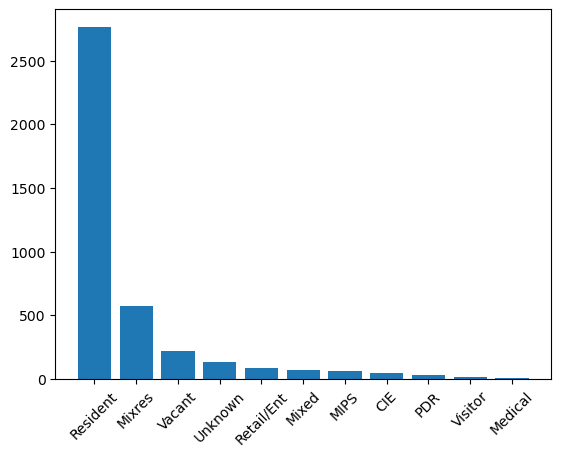

In [21]:
plt.bar(x = distinct_prop['landuse'].value_counts().index, height = distinct_prop['landuse'].value_counts().values)
plt.xticks(rotation = 45);

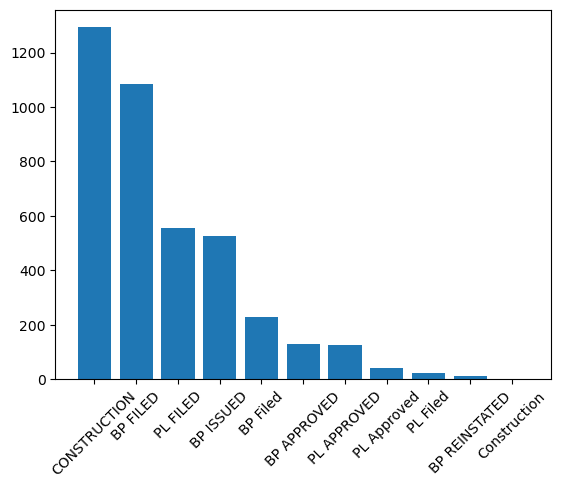

In [22]:
plt.bar(x = distinct_prop['beststat'].value_counts().index, height = distinct_prop['beststat'].value_counts().values)
plt.xticks(rotation = 45);

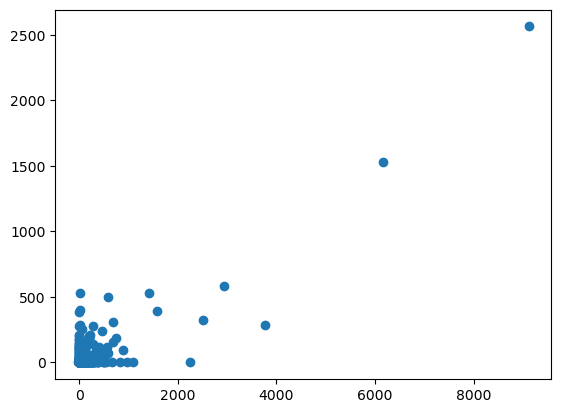

In [23]:
plt.scatter(distinct_prop['pipelineunits'], distinct_prop['affordablenet'])

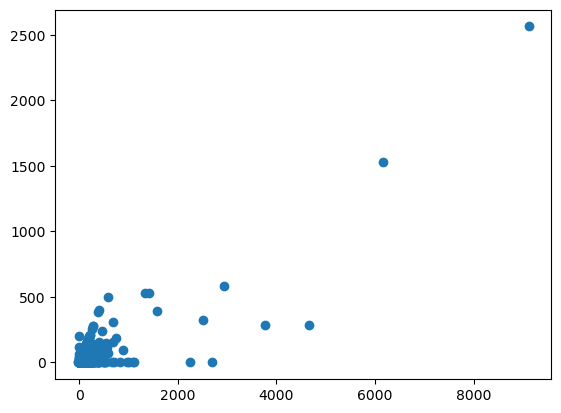

In [24]:
plt.scatter(distinct_prop['unitsnet'], distinct_prop['affordablenet'])

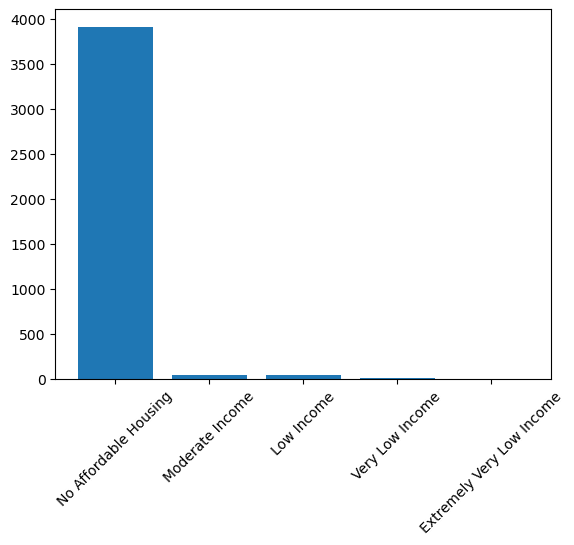

In [25]:
plt.bar(x = distinct_prop['afftarget'].value_counts().index, height = distinct_prop['afftarget'].value_counts().values)
plt.xticks(rotation = 45);